![Python](https://img.shields.io/badge/python-3.9-blue)
![Status: Pending Migration](https://img.shields.io/badge/status-pending%20migration-orange)

<a id="table-of-contents"></a>
# 📖 Table of Contents

[🧭 Objective](#objective)  
- [🛒 What is Association Rule Mining?](#what-is-arm)  
- [📌 Use Cases](#use-cases)

[📦 Data Setup](#data-setup)  
- [🧾 Load Dataset](#load-dataset)  
- [🧹 Preprocessing / Transaction Formatting](#preprocessing)  
- [🧮 Frequency Encoding (Optional)](#frequency-encoding)

[📊 Exploratory Data Analysis](#eda)  
- [📈 Item Frequency Plot](#item-frequency-plot)  
- [📉 Itemset Statistics](#itemset-stats)

[🧰 Apriori Algorithm](#apriori)  
- [⚙️ Setup Parameters](#apriori-params)  
- [📜 Generate Frequent Itemsets](#frequent-itemsets)  
- [🔗 Build Association Rules](#build-rules)

[🧪 Rule Evaluation](#rule-eval)  
- [📏 Support, Confidence, Lift](#basic-metrics)  
- [📐 Conviction, Leverage (Bonus)](#bonus-metrics)  
- [📋 Top Rules by Metric](#top-rules)

[🧠 Interpretation](#interpretation)  
- [🧭 Business Context for Rules](#business-context)  
- [📉 Redundant Rules / Filtering](#rule-filtering)

[📊 Visualizations](#visualizations)  
- [🧱 Heatmaps, Matrix](#heatmap)  
- [🕸 Network Graphs](#network-graph)  
- [📊 Bar Chart of Top Rules](#rule-barplot)

[📌 Final Summary](#final-summary)  
- [✅ Key Learnings](#key-learnings)  
- [💼 Implications for Stakeholders](#stakeholder-insights)

[❓ FAQ / Notes](#faq)  
- [🧯 Pitfalls in Rule Mining](#pitfalls)  
- [🧬 When to use Apriori vs ECLAT / FP-Growth](#algo-choice)

___

<a id="objective"></a>
# 🧭 Objective

<a id="what-is-arm"></a>
#### 🛒 What is Association Rule Mining?

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🛒 What is Association Rule Mining?

Association Rule Mining helps you **discover what items are often bought together**.  
It looks through customer transactions to find patterns like:

- "People who buy bread and butter also tend to buy jam"
- "If a user buys a phone, they often buy a screen protector too"

This technique is **unsupervised** — there's no target variable.  
You're just uncovering **co-occurrence** patterns from raw data.

##### 🧠 Breakdown

An association rule is written as:  
**A → B**  
...which means “if A was bought, then B is likely to be bought too.”

You can control how strong or interesting a rule is using:
- **Support**: How common is this combo?
- **Confidence**: If A happens, how often does B follow?
- **Lift**: Is this combo better than random chance?

</details>


<a id="use-cases"></a>
#### 📌 Use Cases

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📌 Real-World Use Cases of Association Rules

These are not just grocery store tricks. They show up everywhere:

- 🛒 **Retail**: Suggest product bundles ("Customers who bought this also bought...")
- 📩 **Email Marketing**: Find item combos for targeted promotions
- 💳 **Banking**: Detect if certain services (e.g., savings + insurance) are linked
- 🏥 **Healthcare**: Identify symptom-diagnosis patterns across patients
- 🌐 **E-commerce**: Power recommendation engines for cross-sells

The goal:  
Find **co-occurrence relationships** that help you **act smarter** — whether you're selling, diagnosing, or personalizing.

</details>


[Back to the top](#Contents)
___

<a id="data-setup"></a>
# 📦 Data Setup

<a id="load-dataset"></a>
#### 🧾 Load Dataset

In [2]:
# Create a more sophisticated, larger synthetic transaction dataset
import pandas as pd
import numpy as np

np.random.seed(42)

# Define a pool of items and simulate 50 orders
items = ['Milk', 'Bread', 'Butter', 'Eggs', 'Cheese', 'Apples', 'Bananas', 'Juice', 'Cereal', 'Yogurt']
n_orders = 50

# Generate synthetic transactions
transactions = []
for order_id in range(1001, 1001 + n_orders):
    basket_size = np.random.randint(2, 6)  # each order has 2–5 items
    selected_items = np.random.choice(items, size=basket_size, replace=False)
    for item in selected_items:
        transactions.append({'OrderID': order_id, 'Item': item})

df = pd.DataFrame(transactions)
df.head(10)


,OrderID,Item
0,1001,Apples
1,1001,Milk
2,1001,Yogurt
3,1001,Bananas
4,1002,Milk
5,1002,Bananas
6,1002,Cereal
7,1002,Bread
8,1002,Yogurt
9,1003,Bananas


<a id="preprocessing"></a>
#### 🧹 Preprocessing / Transaction Formatting

In [3]:
# Convert transaction data to basket-format binary matrix
basket = df.groupby(['OrderID', 'Item']).size().unstack(fill_value=0)

# Binarize: any count > 0 becomes 1 (transactional presence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head(10)


Item,Apples,Bananas,Bread,Butter,Cereal,Cheese,Eggs,Juice,Milk,Yogurt
OrderID,,,,,,,,,,
1001,1,1,0,0,0,0,0,0,1,1
1002,0,1,1,0,1,0,0,0,1,1
1003,0,1,0,1,1,0,0,0,0,0
1004,1,0,1,0,1,1,0,0,0,0
1005,1,0,0,1,0,0,0,1,0,1
1006,0,0,0,0,0,0,0,1,1,1
1007,1,0,0,0,1,1,0,0,0,1
1008,0,0,0,1,0,0,0,1,1,0
1009,0,0,0,1,1,1,0,0,0,0


<a id="frequency-encoding"></a>
#### 🧮 Frequency Encoding (Optional)

<details><summary><strong>📖 Click to Expand</strong></summary>

Sometimes it's helpful to **analyze item frequency** — how often each product is purchased — before mining rules.  
This helps you:

- Spot dominant or underrepresented products
- Filter rare items (e.g., items bought < 2 times)
- Tune support thresholds more intelligently

</details>


[Back to the top](#Contents)
___

<a id="eda"></a>
# 📊 Exploratory Data Analysis

<a id="item-frequency-plot"></a>
#### 📈 Item Frequency Plot

/var/folders/dg/01ppfw3n6_jbnx4xdx0vdmj40000gn/T/ipykernel_2656/1315152232.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


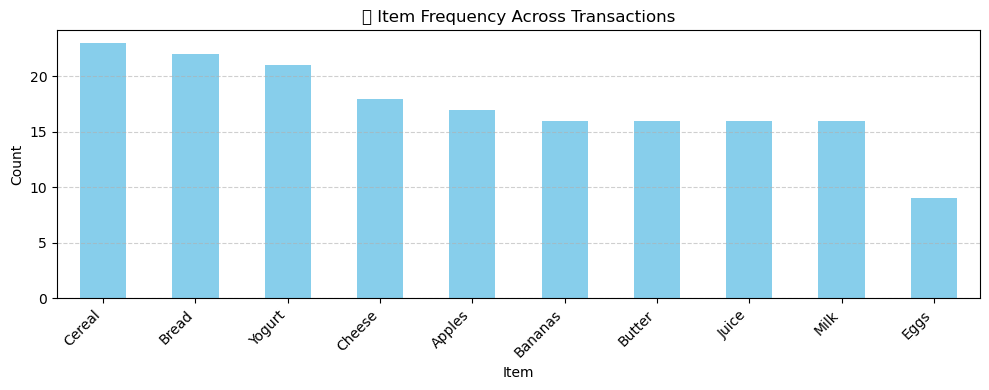

In [4]:
import matplotlib.pyplot as plt

# Frequency of each item across all orders
item_freq = basket.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
item_freq.plot(kind='bar', color='skyblue')
plt.title("📈 Item Frequency Across Transactions")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<a id="itemset-stats"></a>
#### 📉 Itemset Statistics

<details><summary><strong>📖 Click to Expand</strong></summary>

This gives you a sense of **basket richness** — how many items customers typically buy per transaction.  
Use this to evaluate if the data is too sparse or too dense before rule mining.

</details>


In [ ]:
basket['BasketSize'].describe()

mean_basket = basket['BasketSize'].mean()
min_basket = basket['BasketSize'].min()
max_basket = basket['BasketSize'].max()

print(f"🧺 Average basket size: {mean_basket:.2f} items")
print(f"📉 Smallest basket: {min_basket} items")
print(f"📈 Largest basket: {max_basket} items")

🧺 Average basket size: 3.48 items
📉 Smallest basket: 2 items
📈 Largest basket: 5 items


[Back to the top](#Contents)
___

<a id="apriori"></a>
# 🧰 Apriori Algorithm



<details><summary><strong>📖 Click to Expand</strong></summary>

Apriori is a classic algorithm that helps you **find product combinations that occur frequently** in customer orders.

The core idea:
> "If smaller combos are rare, bigger combos with those items will also be rare."

Apriori starts with individual items, then builds up to larger combinations **only if smaller ones are frequent**.  
This keeps the search fast and focused.

You'll use Apriori to:
- Extract common itemsets
- Feed those into a rule builder
- Surface patterns like “If A is bought, B follows”

</details>


<a id="apriori-params"></a>
#### ⚙️ Setup Parameters



<details><summary><strong>📖 Click to Expand</strong></summary>

Apriori requires setting three thresholds to control what gets mined:

- **min_support**: How often a product combo occurs  
  → "Only show me combos bought in at least 10% of orders"

- **min_confidence**: How reliable a rule is  
  → "If people buy A, how often do they also buy B?"

- **min_lift**: Does the combo actually matter or is it random?  
  → Lift > 1 = better than chance

You’ll usually:
- Use support to filter volume
- Use confidence to filter risk
- Use lift to filter noise

</details>


In [8]:
# Set thresholds for rule mining
min_support = 0.1       # Appears in at least 10% of orders
min_confidence = 0.5    # At least 50% confidence in the rule
min_lift = 1.2          # Must be better than chance


<a id="frequent-itemsets"></a>
#### 📜 Generate Frequent Itemsets



<details><summary><strong>📖 Click to Expand</strong></summary>

Frequent itemsets are **combinations of products** that occur together more than the minimum support.

For example:  
{Bread, Butter} → Support = 0.18 → means it appeared in 18% of all orders

These are the **building blocks** for generating association rules.

</details>


In [9]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets
frequent_itemsets = apriori(basket.drop(columns='BasketSize'), 
                            min_support=min_support, 
                            use_colnames=True)

# Sort by support to show top combos
frequent_itemsets.sort_values(by='support', ascending=False).head()


/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
4,0.46,(Cereal)
2,0.44,(Bread)
9,0.42,(Yogurt)
5,0.36,(Cheese)
0,0.34,(Apples)


<a id="build-rules"></a>
#### 🔗 Build Association Rules



<details><summary><strong>📖 Click to Expand</strong></summary>

Once you have frequent itemsets, you can build **association rules** like:

> If A is bought → B is also likely  
> Example: {Bread} → {Butter}

Each rule is scored using:

- **Support**: How often this combo appears
- **Confidence**: How reliable this rule is
- **Lift**: How much stronger this rule is compared to random chance

You can filter rules to focus on high-impact patterns.

</details>


In [10]:
from mlxtend.frequent_patterns import association_rules

# Build rules from itemsets
rules = association_rules(frequent_itemsets, 
                          metric="lift", 
                          min_threshold=min_lift)

# Filter by confidence
rules = rules[rules['confidence'] >= min_confidence]

# Show top rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']] \
    .sort_values(by='lift', ascending=False).head()


,antecedents,consequents,support,confidence,lift
6,"(Cereal, Apples)",(Cheese),0.12,0.857143,2.380952
4,(Eggs),(Yogurt),0.14,0.777778,1.851852
7,"(Cereal, Cheese)",(Apples),0.12,0.600000,1.764706
8,"(Apples, Cheese)",(Cereal),0.12,0.750000,1.630435
3,(Cheese),(Cereal),0.20,0.555556,1.207729


[Back to the top](#Contents)
___

<a id="rule-eval"></a>
# 🧪 Rule Evaluation



<a id="basic-metrics"></a>
#### 📏 Support, Confidence, Lift



<a id="bonus-metrics"></a>
#### 📐 Conviction, Leverage (Bonus)



<a id="top-rules"></a>
#### 📋 Top Rules by Metric



[Back to the top](#Contents)
___

<a id="interpretation"></a>
# 🧠 Interpretation



<a id="business-context"></a>
#### 🧭 Business Context for Rules



<a id="rule-filtering"></a>
#### 📉 Redundant Rules / Filtering



[Back to the top](#Contents)
___

<a id="visualizations"></a>
# 📊 Visualizations



<a id="heatmap"></a>
#### 🧱 Heatmaps, Matrix



<a id="network-graph"></a>
#### 🕸 Network Graphs



<a id="rule-barplot"></a>
#### 📊 Bar Chart of Top Rules



[Back to the top](#Contents)
___

<a id="final-summary"></a>
# 📌 Final Summary



<a id="key-learnings"></a>
#### ✅ Key Learnings



<a id="stakeholder-insights"></a>
#### 💼 Implications for Stakeholders



[Back to the top](#Contents)
___

<a id="faq"></a>
# ❓ FAQ / Notes



<a id="pitfalls"></a>
#### 🧯 Pitfalls in Rule Mining



<a id="algo-choice"></a>
#### 🧬 When to use Apriori vs ECLAT / FP-Growth


[Back to the top](#Contents)
___